In [34]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [35]:
data = pd.read_csv("TP.csv")
FP = pd.read_csv("Female_population.csv", skiprows=4)
MP = pd.read_csv("Male_population.csv", skiprows=4)
Concat = pd.concat([data,FP,MP], ignore_index=True)
Concat.to_csv('TP.csv', index=False)

In [36]:
data = pd.read_csv("TP.csv")
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,Kosovo,XKX,"Population, male",SP.POP.TOTL.MA.IN,480530.0,490286.0,504594.0,518893.0,533197.0,547497.0,...,892179.0,886760.0,893367.0,896319.0,892156.0,892592.0,890237.0,878107.0,NaN,NaN
3440,"Yemen, Rep.",YEM,"Population, male",SP.POP.TOTL.MA.IN,2766233.0,2815795.0,2865985.0,2915350.0,2968527.0,3027525.0,...,14439156.0,14820156.0,15202496.0,15578957.0,15953578.0,16320979.0,16668432.0,17023203.0,NaN,NaN
3441,South Africa,ZAF,"Population, male",SP.POP.TOTL.MA.IN,8502461.0,8725719.0,8971110.0,9228327.0,9496079.0,9774939.0,...,27155417.0,27418165.0,27465269.0,27822349.0,28207948.0,28580784.0,28894608.0,29168006.0,NaN,NaN
3442,Zambia,ZMB,"Population, male",SP.POP.TOTL.MA.IN,1544463.0,1593349.0,1644170.0,1696940.0,1751316.0,1807590.0,...,8000338.0,8260471.0,8525934.0,8794716.0,9066397.0,9338613.0,9609004.0,9877642.0,NaN,NaN


In [37]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN,NaN


In [38]:
data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
3439,Kosovo,XKX,"Population, male",SP.POP.TOTL.MA.IN,480530.0,490286.0,504594.0,518893.0,533197.0,547497.0,...,892179.0,886760.0,893367.0,896319.0,892156.0,892592.0,890237.0,878107.0,NaN,NaN
3440,"Yemen, Rep.",YEM,"Population, male",SP.POP.TOTL.MA.IN,2766233.0,2815795.0,2865985.0,2915350.0,2968527.0,3027525.0,...,14439156.0,14820156.0,15202496.0,15578957.0,15953578.0,16320979.0,16668432.0,17023203.0,NaN,NaN
3441,South Africa,ZAF,"Population, male",SP.POP.TOTL.MA.IN,8502461.0,8725719.0,8971110.0,9228327.0,9496079.0,9774939.0,...,27155417.0,27418165.0,27465269.0,27822349.0,28207948.0,28580784.0,28894608.0,29168006.0,NaN,NaN
3442,Zambia,ZMB,"Population, male",SP.POP.TOTL.MA.IN,1544463.0,1593349.0,1644170.0,1696940.0,1751316.0,1807590.0,...,8000338.0,8260471.0,8525934.0,8794716.0,9066397.0,9338613.0,9609004.0,9877642.0,NaN,NaN
3443,Zimbabwe,ZWE,"Population, male",SP.POP.TOTL.MA.IN,1883976.0,1942236.0,2002581.0,2065073.0,2129644.0,2196331.0,...,6652836.0,6796658.0,6940631.0,7086002.0,7231989.0,7385220.0,7543690.0,7705601.0,NaN,NaN


In [39]:
data.isnull().sum()

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
1960                12
                  ... 
2020                 6
2021                 6
2022                 6
2023              3444
Unnamed: 68       3444
Length: 69, dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3444 entries, 0 to 3443
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3444 non-null   object 
 1   Country Code    3444 non-null   object 
 2   Indicator Name  3444 non-null   object 
 3   Indicator Code  3444 non-null   object 
 4   1960            3432 non-null   float64
 5   1961            3432 non-null   float64
 6   1962            3432 non-null   float64
 7   1963            3432 non-null   float64
 8   1964            3432 non-null   float64
 9   1965            3432 non-null   float64
 10  1966            3432 non-null   float64
 11  1967            3432 non-null   float64
 12  1968            3432 non-null   float64
 13  1969            3432 non-null   float64
 14  1970            3432 non-null   float64
 15  1971            3432 non-null   float64
 16  1972            3432 non-null   float64
 17  1973            3432 non-null   f

In [41]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

In [42]:
data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
count,3.432000e+03,3.432000e+03,3.432000e+03,3.432000e+03,3.432000e+03,3.432000e+03,3.432000e+03,3.432000e+03,3.432000e+03,3.432000e+03,...,3.438000e+03,3.438000e+03,3.438000e+03,3.438000e+03,3.438000e+03,3.438000e+03,3.438000e+03,3.438000e+03,0.0,0.0
mean,6.315401e+07,6.402073e+07,6.518944e+07,6.663374e+07,6.809008e+07,6.956737e+07,7.110695e+07,7.264569e+07,7.422763e+07,7.586622e+07,...,1.621292e+08,1.642035e+08,1.662810e+08,1.683241e+08,1.703235e+08,1.722601e+08,1.740199e+08,1.756121e+08,NaN,NaN
std,2.052419e+08,2.077678e+08,2.114980e+08,2.163274e+08,2.211804e+08,2.261063e+08,2.312894e+08,2.364488e+08,2.417677e+08,2.473039e+08,...,5.232487e+08,5.294610e+08,5.356779e+08,5.417305e+08,5.475987e+08,5.532057e+08,5.582679e+08,5.626836e+08,NaN,NaN
min,1.258000e+03,1.389000e+03,1.540000e+03,1.702000e+03,1.873000e+03,2.054000e+03,2.245000e+03,2.394000e+03,2.486000e+03,2.604000e+03,...,5.261000e+03,5.244000e+03,5.230000e+03,5.252000e+03,5.301000e+03,5.367000e+03,5.449000e+03,5.513000e+03,NaN,NaN
25%,2.673140e+05,2.724620e+05,2.779850e+05,2.838700e+05,2.901110e+05,2.896780e+05,2.867840e+05,2.889780e+05,2.946920e+05,3.151660e+05,...,8.831880e+05,8.877692e+05,8.944340e+05,8.974308e+05,8.932975e+05,8.938292e+05,8.916280e+05,8.838892e+05,NaN,NaN
50%,2.001044e+06,2.038685e+06,2.076670e+06,2.117115e+06,2.174441e+06,2.203709e+06,2.253777e+06,2.313804e+06,2.354795e+06,2.389020e+06,...,5.319770e+06,5.394724e+06,5.388641e+06,5.424120e+06,5.467106e+06,5.472181e+06,5.535650e+06,5.562694e+06,NaN,NaN
75%,1.352790e+07,1.389373e+07,1.427959e+07,1.467361e+07,1.505867e+07,1.544980e+07,1.584376e+07,1.626246e+07,1.660340e+07,1.685483e+07,...,3.304141e+07,3.337987e+07,3.401418e+07,3.441904e+07,3.450149e+07,3.463511e+07,3.479401e+07,3.480610e+07,NaN,NaN
max,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,3.398480e+09,3.468371e+09,3.540164e+09,3.614573e+09,...,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09,NaN,NaN


In [43]:
data.isnull()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3440,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3441,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3442,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [44]:
data = data.drop(columns='2023', errors='ignore')
data = data.drop(columns='Unnamed: 68', errors='ignore')
data = data.dropna()
data.to_csv('Total_population.csv', index=False)

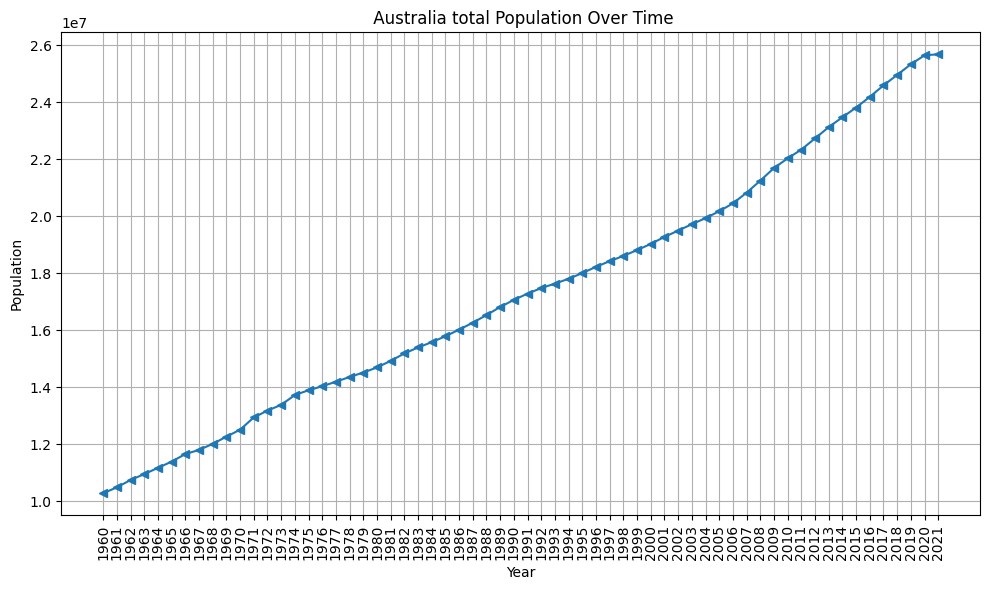

In [45]:
country_name = 'Australia'
country_data = data[data['Country Name'] == country_name]
years = country_data.columns[4:-1]  
population = country_data.values[0][4:-1]
plt.figure(figsize=(10, 6))
plt.plot(years, population, marker='<', linestyle='-')
plt.title(f" {country_name} total Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
IC = data[data['Indicator Code'] == 'SP.POP.TOTL']
IC

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0


In [47]:
IC_sort = IC.sort_values(by = '2022', ascending = False)
First_10 = IC_sort.head(10)
First_10

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
257,World,WLD,"Population, total",SP.POP.TOTL,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,...,7.229303e+09,7.317040e+09,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09
103,IDA & IBRD total,IBT,"Population, total",SP.POP.TOTL,2.297972e+09,2.329504e+09,2.374276e+09,2.431314e+09,2.488809e+09,2.547220e+09,...,6.079502e+09,6.160290e+09,6.240231e+09,6.319805e+09,6.399653e+09,6.477695e+09,6.553978e+09,6.627317e+09,6.695488e+09,6.754030e+09
139,Low & middle income,LMY,"Population, total",SP.POP.TOTL,2.243179e+09,2.274050e+09,2.318173e+09,2.374537e+09,2.431355e+09,2.489219e+09,...,6.000647e+09,6.081161e+09,6.160876e+09,6.240319e+09,6.320334e+09,6.399037e+09,6.476093e+09,6.549996e+09,6.618837e+09,6.678280e+09
155,Middle income,MIC,"Population, total",SP.POP.TOTL,2.107416e+09,2.135116e+09,2.175940e+09,2.228877e+09,2.282094e+09,2.336193e+09,...,5.446811e+09,5.513458e+09,5.578703e+09,5.642636e+09,5.706387e+09,5.768171e+09,5.827338e+09,5.882943e+09,5.933587e+09,5.974552e+09
102,IBRD only,IBD,"Population, total",SP.POP.TOTL,1.904347e+09,1.926043e+09,1.960606e+09,2.007061e+09,2.053555e+09,2.100537e+09,...,4.567978e+09,4.616585e+09,4.663653e+09,4.709004e+09,4.753252e+09,4.794556e+09,4.832929e+09,4.867092e+09,4.895373e+09,4.913887e+09
62,Early-demographic dividend,EAR,"Population, total",SP.POP.TOTL,9.794615e+08,1.004319e+09,1.029962e+09,1.056327e+09,1.083430e+09,1.110603e+09,...,3.078407e+09,3.121656e+09,3.165215e+09,3.208370e+09,3.250753e+09,3.292897e+09,3.334562e+09,3.374384e+09,3.411268e+09,3.447399e+09
138,Lower middle income,LMC,"Population, total",SP.POP.TOTL,9.058328e+08,9.276212e+08,9.499254e+08,9.728725e+08,9.963528e+08,1.020044e+09,...,2.813932e+09,2.858673e+09,2.902878e+09,2.946639e+09,2.990173e+09,3.033153e+09,3.075312e+09,3.117226e+09,3.157462e+09,3.190184e+09
247,Upper middle income,UMC,"Population, total",SP.POP.TOTL,1.201583e+09,1.207494e+09,1.226014e+09,1.256005e+09,1.285741e+09,1.316149e+09,...,2.632879e+09,2.654785e+09,2.675825e+09,2.695996e+09,2.716215e+09,2.735018e+09,2.752026e+09,2.765717e+09,2.776125e+09,2.784368e+09
63,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.043334e+09,1.045203e+09,1.059600e+09,1.085399e+09,1.110819e+09,1.136927e+09,...,2.261274e+09,2.278232e+09,2.294507e+09,2.310722e+09,2.327133e+09,2.341384e+09,2.353857e+09,2.363934e+09,2.370190e+09,2.375162e+09
141,Late-demographic dividend,LTE,"Population, total",SP.POP.TOTL,1.095549e+09,1.097729e+09,1.112143e+09,1.137972e+09,1.163377e+09,1.189486e+09,...,2.228485e+09,2.244043e+09,2.258406e+09,2.272340e+09,2.286628e+09,2.298988e+09,2.309492e+09,2.317278e+09,2.322606e+09,2.325543e+09


Text(0, 0.5, 'Country')

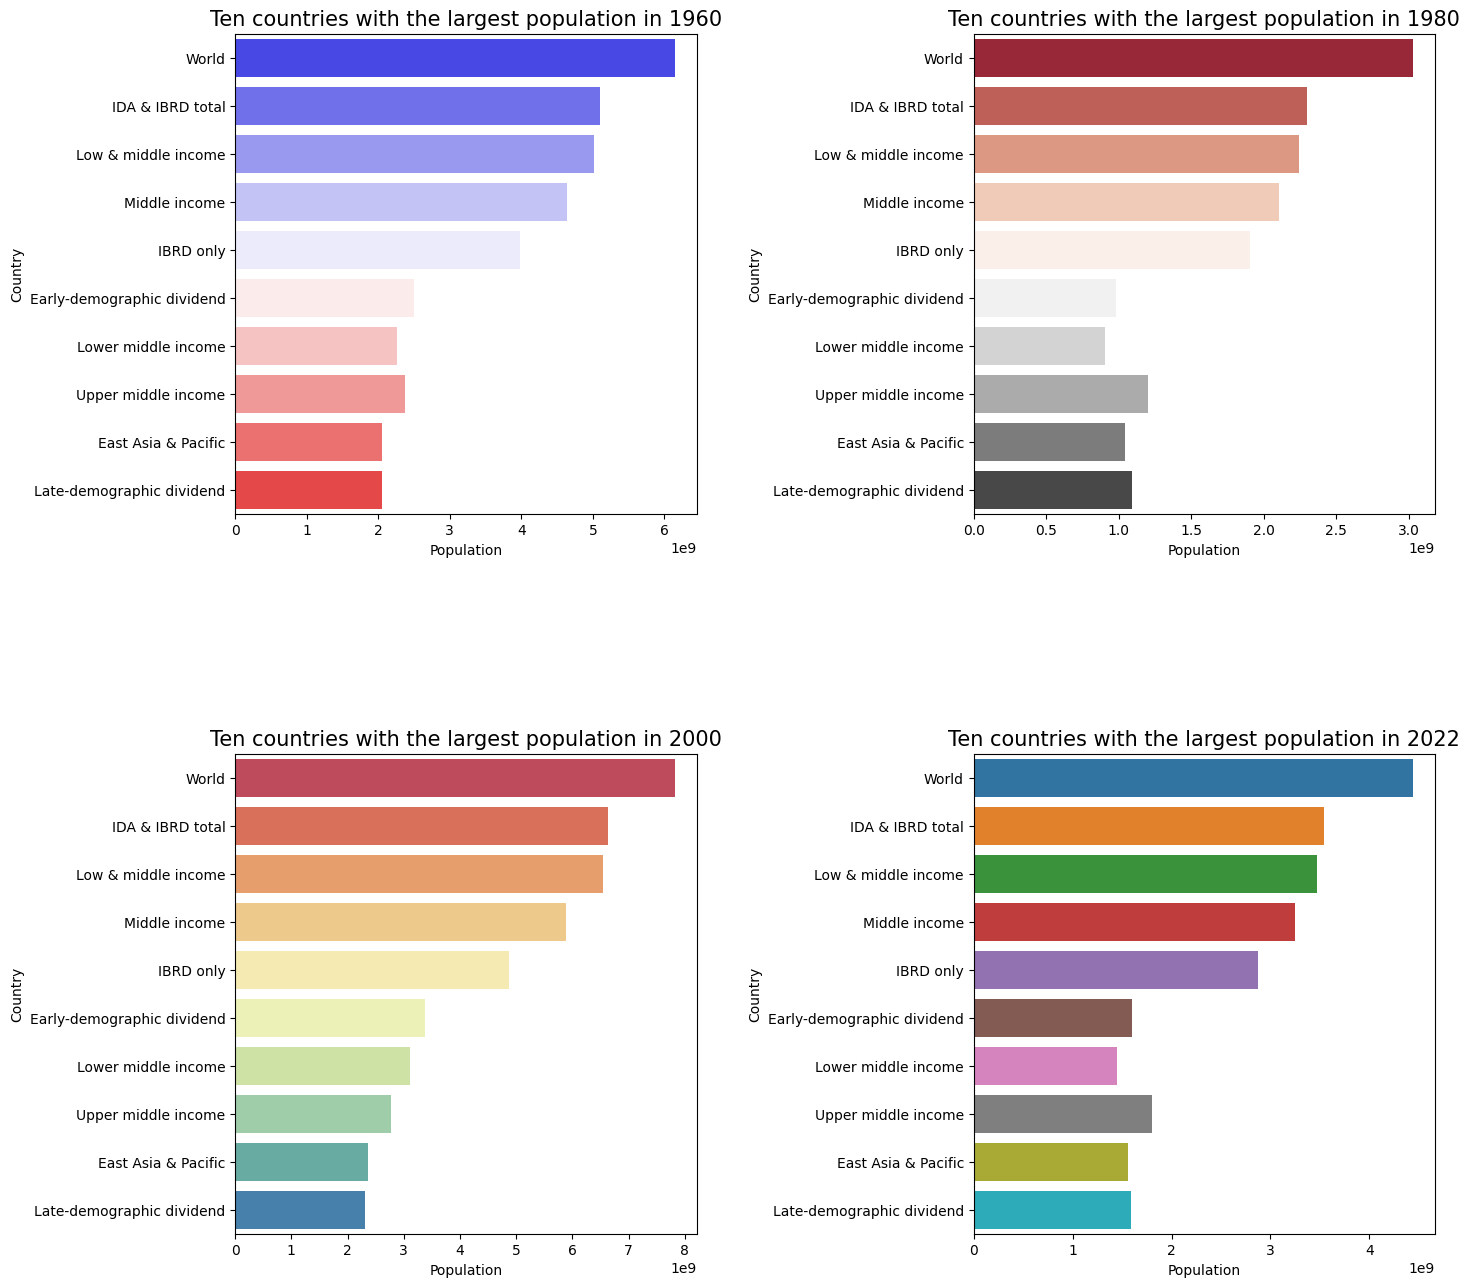

In [48]:
plt.figure(figsize = (15,15))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top =0.9, wspace = 0.6, hspace = 0.5)

plt.subplot(2, 2, 1)
plt.title('Ten countries with the largest population in 1960', size = 15)
sns.barplot(x = '2000', y = 'Country Name', data = First_10, palette= 'bwr')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 2)
plt.title('Ten countries with the largest population in 1980', size = 15)
sns.barplot(x = '1960', y = 'Country Name', data = First_10, palette= 'RdGy')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 3)
plt.title('Ten countries with the largest population in 2000', size = 15)
sns.barplot(x = '2020', y = 'Country Name', data = First_10, palette= 'Spectral')
plt.xlabel('Population')
plt.ylabel('Country')


plt.subplot(2, 2, 4)
plt.title('Ten countries with the largest population in 2022', size = 15)
sns.barplot(x = '1980', y = 'Country Name', data = First_10, palette= 'tab10')
plt.xlabel('Population')
plt.ylabel('Country')

In [74]:
IC_male = data[data['Indicator Code'] == 'SP.POP.TOTL.MA.IN']
IC_sort_male = IC_male.sort_values(by = '2022', ascending = False)
First_10_male = IC_sort_male.head(10)
First_10_male

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1313,World,WLD,"Population, male",SP.POP.TOTL.MA.IN,1.514860e+09,1.535309e+09,1.562679e+09,1.596305e+09,1.630147e+09,1.664253e+09,...,3.637693e+09,3.682046e+09,3.725936e+09,3.769468e+09,3.812480e+09,3.854340e+09,3.894743e+09,3.933158e+09,3.966057e+09,3.996521e+09
3437,World,WLD,"Population, male",SP.POP.TOTL.MA.IN,1.514860e+09,1.535309e+09,1.562679e+09,1.596305e+09,1.630147e+09,1.664253e+09,...,3.637693e+09,3.682046e+09,3.725936e+09,3.769468e+09,3.812480e+09,3.854340e+09,3.894743e+09,3.933158e+09,3.966057e+09,3.996521e+09
785,World,WLD,"Population, male",SP.POP.TOTL.MA.IN,1.514860e+09,1.535309e+09,1.562679e+09,1.596305e+09,1.630147e+09,1.664253e+09,...,3.637693e+09,3.682046e+09,3.725936e+09,3.769468e+09,3.812480e+09,3.854340e+09,3.894743e+09,3.933158e+09,3.966057e+09,3.996521e+09
2373,World,WLD,"Population, male",SP.POP.TOTL.MA.IN,1.514860e+09,1.535309e+09,1.562679e+09,1.596305e+09,1.630147e+09,1.664253e+09,...,3.637693e+09,3.682046e+09,3.725936e+09,3.769468e+09,3.812480e+09,3.854340e+09,3.894743e+09,3.933158e+09,3.966057e+09,3.996521e+09
2905,World,WLD,"Population, male",SP.POP.TOTL.MA.IN,1.514860e+09,1.535309e+09,1.562679e+09,1.596305e+09,1.630147e+09,1.664253e+09,...,3.637693e+09,3.682046e+09,3.725936e+09,3.769468e+09,3.812480e+09,3.854340e+09,3.894743e+09,3.933158e+09,3.966057e+09,3.996521e+09
1841,World,WLD,"Population, male",SP.POP.TOTL.MA.IN,1.514860e+09,1.535309e+09,1.562679e+09,1.596305e+09,1.630147e+09,1.664253e+09,...,3.637693e+09,3.682046e+09,3.725936e+09,3.769468e+09,3.812480e+09,3.854340e+09,3.894743e+09,3.933158e+09,3.966057e+09,3.996521e+09
1159,IDA & IBRD total,IBT,"Population, male",SP.POP.TOTL.MA.IN,1.156430e+09,1.172211e+09,1.194802e+09,1.223697e+09,1.252817e+09,1.282335e+09,...,3.066620e+09,3.107190e+09,3.147184e+09,3.186707e+09,3.226282e+09,3.264942e+09,3.302629e+09,3.338658e+09,3.371850e+09,3.400361e+09
631,IDA & IBRD total,IBT,"Population, male",SP.POP.TOTL.MA.IN,1.156430e+09,1.172211e+09,1.194802e+09,1.223697e+09,1.252817e+09,1.282335e+09,...,3.066620e+09,3.107190e+09,3.147184e+09,3.186707e+09,3.226282e+09,3.264942e+09,3.302629e+09,3.338658e+09,3.371850e+09,3.400361e+09
1687,IDA & IBRD total,IBT,"Population, male",SP.POP.TOTL.MA.IN,1.156430e+09,1.172211e+09,1.194802e+09,1.223697e+09,1.252817e+09,1.282335e+09,...,3.066620e+09,3.107190e+09,3.147184e+09,3.186707e+09,3.226282e+09,3.264942e+09,3.302629e+09,3.338658e+09,3.371850e+09,3.400361e+09
2217,IDA & IBRD total,IBT,"Population, male",SP.POP.TOTL.MA.IN,1.156430e+09,1.172211e+09,1.194802e+09,1.223697e+09,1.252817e+09,1.282335e+09,...,3.066620e+09,3.107190e+09,3.147184e+09,3.186707e+09,3.226282e+09,3.264942e+09,3.302629e+09,3.338658e+09,3.371850e+09,3.400361e+09


Text(0, 0.5, 'Country')

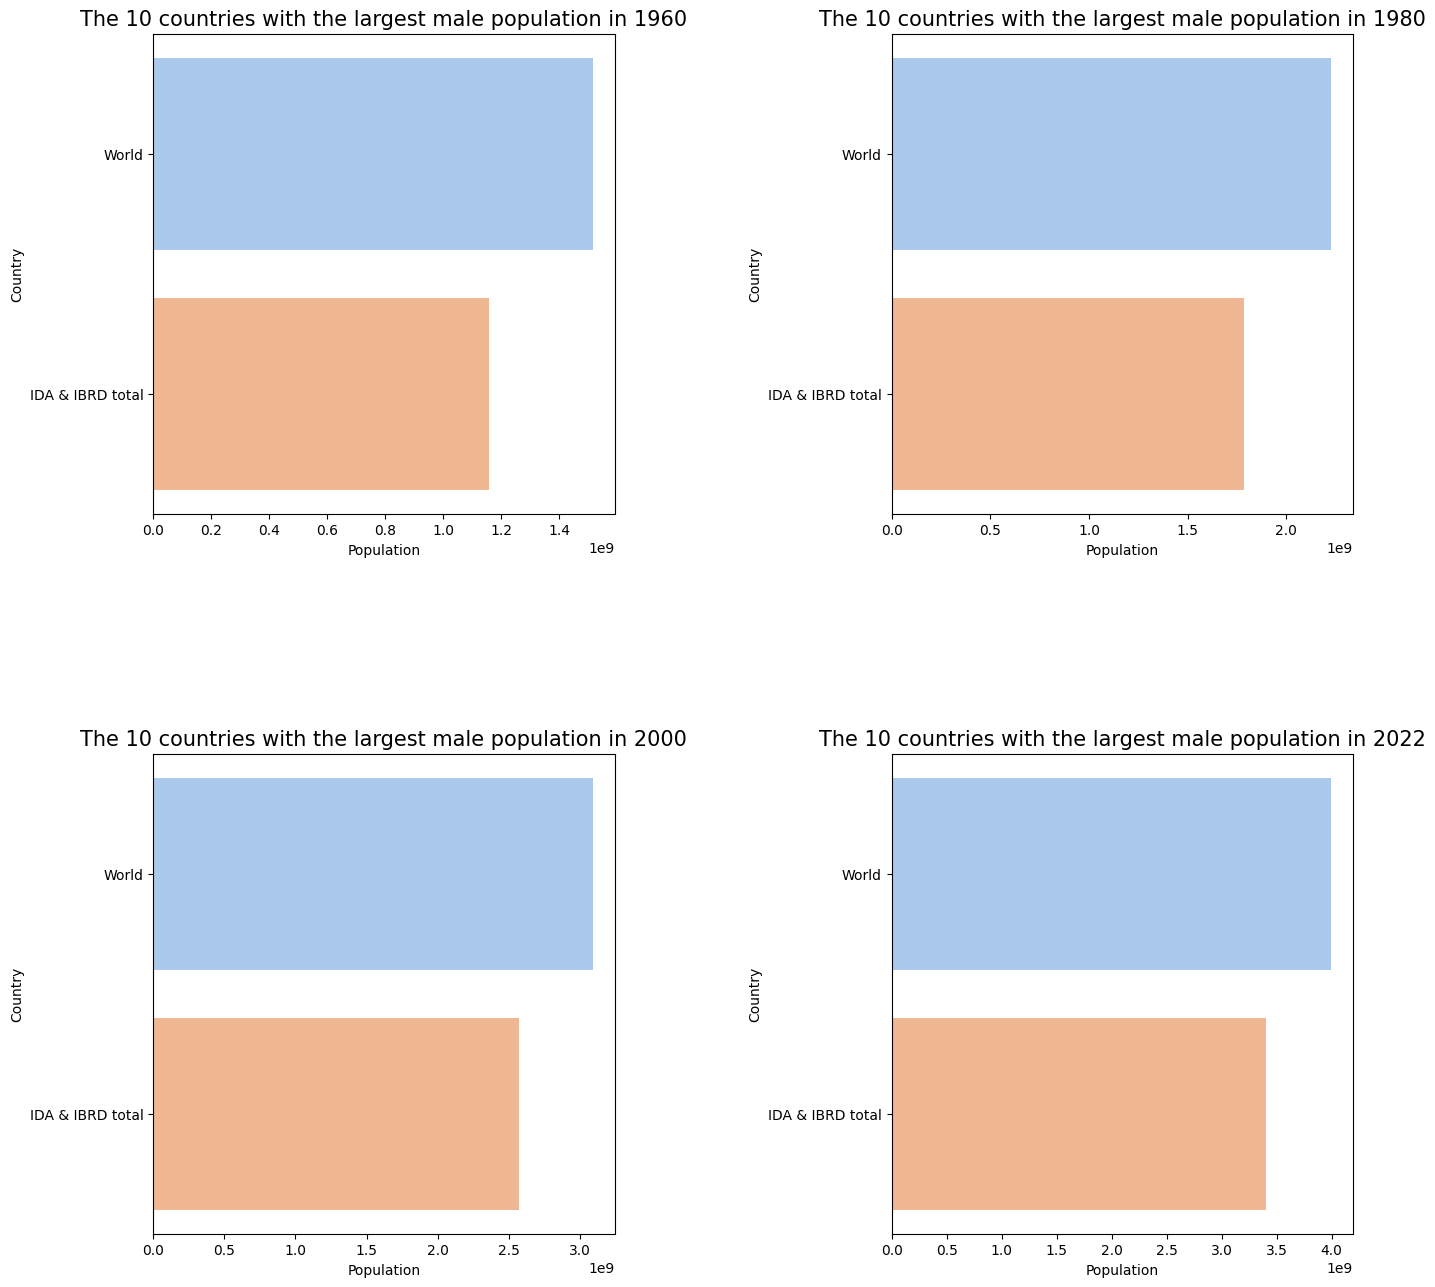

In [75]:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top =0.9, wspace = 0.6, hspace = 0.5)

plt.subplot(2, 2, 1)
plt.title('The 10 countries with the largest male population in 1960', size = 15)
sns.barplot(x = '1960', y = 'Country Name', data = First_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 2)
plt.title('The 10 countries with the largest male population in 1980', size = 15)
sns.barplot(x = '1980', y = 'Country Name', data = First_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 3)
plt.title('The 10 countries with the largest male population in 2000', size = 15)
sns.barplot(x = '2000', y = 'Country Name', data = First_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')


plt.subplot(2, 2, 4)
plt.title('The 10 countries with the largest male population in 2022', size = 15)
sns.barplot(x = '2022', y = 'Country Name', data =First_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

In [76]:
IC_female = data[data['Indicator Code'] == 'SP.POP.TOTL.FE.IN']

IC_sort_female = IC_female.sort_values(by = '2022', ascending = False)
First_10_female = IC_sort_female.head(10)
First_10_female

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2639,World,WLD,"Population, female",SP.POP.TOTL.FE.IN,1.516615e+09,1.537113e+09,1.564171e+09,1.597124e+09,1.630295e+09,1.663956e+09,...,3.591610e+09,3.634994e+09,3.677914e+09,3.720948e+09,3.763962e+09,3.806032e+09,3.847032e+09,3.887047e+09,3.922249e+09,3.954426e+09
1577,World,WLD,"Population, female",SP.POP.TOTL.FE.IN,1.516615e+09,1.537113e+09,1.564171e+09,1.597124e+09,1.630295e+09,1.663956e+09,...,3.591610e+09,3.634994e+09,3.677914e+09,3.720948e+09,3.763962e+09,3.806032e+09,3.847032e+09,3.887047e+09,3.922249e+09,3.954426e+09
2107,World,WLD,"Population, female",SP.POP.TOTL.FE.IN,1.516615e+09,1.537113e+09,1.564171e+09,1.597124e+09,1.630295e+09,1.663956e+09,...,3.591610e+09,3.634994e+09,3.677914e+09,3.720948e+09,3.763962e+09,3.806032e+09,3.847032e+09,3.887047e+09,3.922249e+09,3.954426e+09
1049,World,WLD,"Population, female",SP.POP.TOTL.FE.IN,1.516615e+09,1.537113e+09,1.564171e+09,1.597124e+09,1.630295e+09,1.663956e+09,...,3.591610e+09,3.634994e+09,3.677914e+09,3.720948e+09,3.763962e+09,3.806032e+09,3.847032e+09,3.887047e+09,3.922249e+09,3.954426e+09
521,World,WLD,"Population, female",SP.POP.TOTL.FE.IN,1.516615e+09,1.537113e+09,1.564171e+09,1.597124e+09,1.630295e+09,1.663956e+09,...,3.591610e+09,3.634994e+09,3.677914e+09,3.720948e+09,3.763962e+09,3.806032e+09,3.847032e+09,3.887047e+09,3.922249e+09,3.954426e+09
3171,World,WLD,"Population, female",SP.POP.TOTL.FE.IN,1.516615e+09,1.537113e+09,1.564171e+09,1.597124e+09,1.630295e+09,1.663956e+09,...,3.591610e+09,3.634994e+09,3.677914e+09,3.720948e+09,3.763962e+09,3.806032e+09,3.847032e+09,3.887047e+09,3.922249e+09,3.954426e+09
1423,IDA & IBRD total,IBT,"Population, female",SP.POP.TOTL.FE.IN,1.141542e+09,1.157293e+09,1.179474e+09,1.207617e+09,1.235992e+09,1.264885e+09,...,3.012881e+09,3.053100e+09,3.093047e+09,3.133098e+09,3.173371e+09,3.212754e+09,3.251349e+09,3.288659e+09,3.323637e+09,3.353669e+09
895,IDA & IBRD total,IBT,"Population, female",SP.POP.TOTL.FE.IN,1.141542e+09,1.157293e+09,1.179474e+09,1.207617e+09,1.235992e+09,1.264885e+09,...,3.012881e+09,3.053100e+09,3.093047e+09,3.133098e+09,3.173371e+09,3.212754e+09,3.251349e+09,3.288659e+09,3.323637e+09,3.353669e+09
1951,IDA & IBRD total,IBT,"Population, female",SP.POP.TOTL.FE.IN,1.141542e+09,1.157293e+09,1.179474e+09,1.207617e+09,1.235992e+09,1.264885e+09,...,3.012881e+09,3.053100e+09,3.093047e+09,3.133098e+09,3.173371e+09,3.212754e+09,3.251349e+09,3.288659e+09,3.323637e+09,3.353669e+09
3015,IDA & IBRD total,IBT,"Population, female",SP.POP.TOTL.FE.IN,1.141542e+09,1.157293e+09,1.179474e+09,1.207617e+09,1.235992e+09,1.264885e+09,...,3.012881e+09,3.053100e+09,3.093047e+09,3.133098e+09,3.173371e+09,3.212754e+09,3.251349e+09,3.288659e+09,3.323637e+09,3.353669e+09


Text(0, 0.5, 'Country')

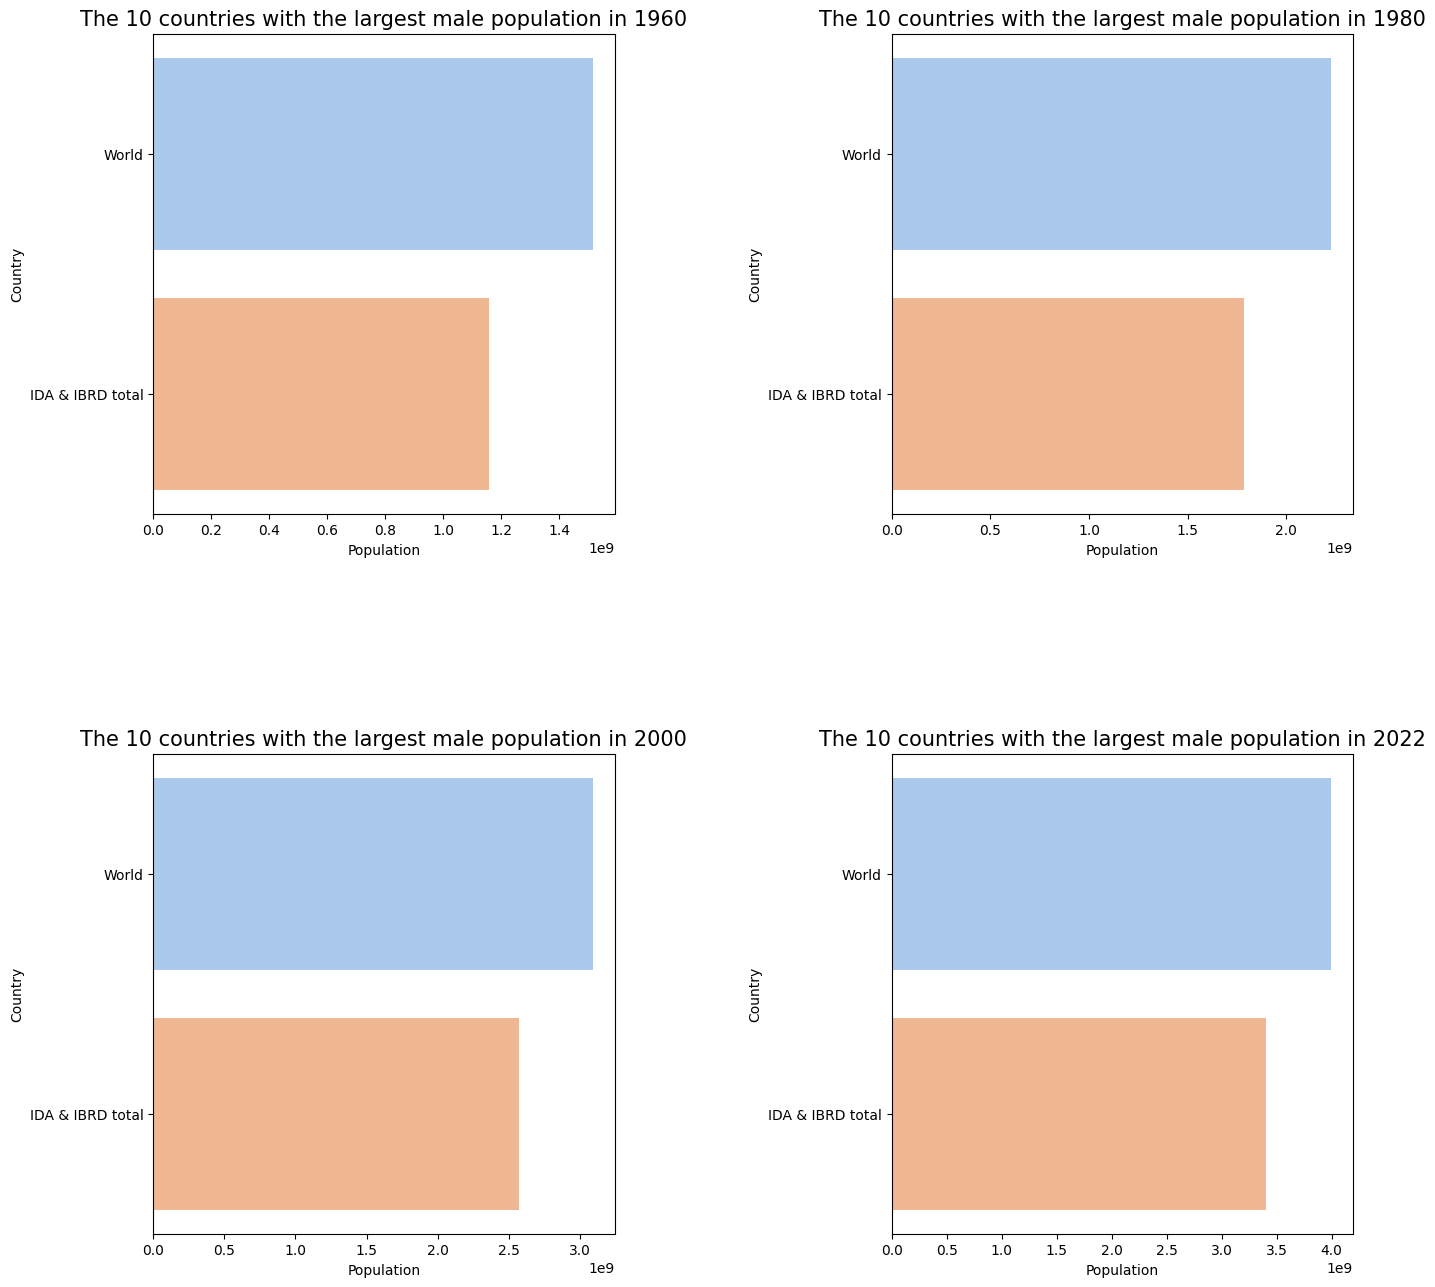

In [77]:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top =0.9, wspace = 0.6, hspace = 0.5)

plt.subplot(2, 2, 1)
plt.title('The 10 countries with the largest male population in 1960', size = 15)
sns.barplot(x = '1960', y = 'Country Name', data = First_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 2)
plt.title('The 10 countries with the largest male population in 1980', size = 15)
sns.barplot(x = '1980', y = 'Country Name', data = First_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 3)
plt.title('The 10 countries with the largest male population in 2000', size = 15)
sns.barplot(x = '2000', y = 'Country Name', data = First_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')


plt.subplot(2, 2, 4)
plt.title('The 10 countries with the largest male population in 2022', size = 15)
sns.barplot(x = '2022', y = 'Country Name', data =First_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')